In [16]:
#importing libraries
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import csv
import math
from sklearn import svm

In [4]:
#loading the dataset
f= open("binclass.txt")
df1 = pd.DataFrame(columns=["x1","x2","y"])

In [5]:
#creating a dataframe
i=0
for row in f:
    t = row.replace("\n","").split(",")
    df1.loc[i] = {"x1": float(t[0]), "x2" : float(t[1]), "y" : t[2]}
    i+=1

In [6]:
#creating separate dataframes for each class
df1_positive = df1[df1["y"]=="1"]
df1_negative = df1[df1["y"]=="-1"]

In [7]:
#calculating mean of each feature in each class
df1_positive_mean = [ df1_positive["x1"].mean() , df1_positive["x2"].mean() ]
df1_negative_mean = [ df1_negative["x1"].mean() , df1_negative["x2"].mean() ]

In [9]:
#calculating cov fo each class and storing optimal cov in cov_opt
df1_cov = [0,0]
for row in df1_positive[["x1","x2"]].values:
    arr = np.array(row- df1_positive_mean)
    df1_cov[0] += np.dot(arr,arr.T)

cov_opt=df1_cov[0] 
df1_cov[0] /= 200

for row in df1_negative[["x1","x2"]].values:
    arr = np.array(row- df1_negative_mean)
    df1_cov[1] += np.dot(arr,arr.T)
    
cov_opt += df1_cov[1]
df1_cov[1] /= 200

cov_opt /=400
cov_opt

36.10650468578736

In [10]:
#calculating minimum and maximum value of each feature in each class
df1_min = [df1["x1"].min()-1, df1["x2"].min()-1]
df1_max = [df1["x1"].max()+1, df1["x2"].max()+1]

In [11]:
h = 0.2
xx, yy = np.meshgrid(np.arange(df1_min[0], df1_max[0], h), np.arange(df1_min[1], df1_max[1], h))
z = np.c_[xx.ravel(),yy.ravel()]
l_x = []
l_y = []
l_x1 =[]
l_y1 =[]

In [12]:
for point in z:
    arr1 = np.array(point-df1_positive_mean)
    arr2 = np.array(point-df1_negative_mean)

    #different cov for each class
    probability1 = round(math.exp(((-1)*np.dot(arr1,arr1.T))/(2*df1_cov[0]))/(2*np.pi*np.sqrt(df1_cov[0])),4)
    probability2 = round(math.exp(((-1)*np.dot(arr2,arr2.T))/(2*df1_cov[1]))/(2*np.pi*np.sqrt(df1_cov[1])),4)
    
    #same cov for each class
    probability1_s = round(math.exp(((-1)*np.dot(arr1,arr1.T))/(2*cov_opt))/(2*np.pi*np.sqrt(cov_opt)),6)
    probability2_s = round(math.exp(((-1)*np.dot(arr2,arr2.T))/(2*cov_opt))/(2*np.pi*np.sqrt(cov_opt)),6)
    
    
    #finding the points at decision boundary for model with different cov for each class
    if(probability1==probability2 and probability1!=0 and probability2!=0):
        l_x.append(point[0])
        l_y.append(point[1])

    #finding the points at decision boundary for model with same cov for both class
    if(probability1_s ==probability2_s and probability1_s!=0 and probability2_s!=0):
        l_x1.append(point[0])
        l_y1.append(point[1])

Text(0.5, 1.0, 'SVM')

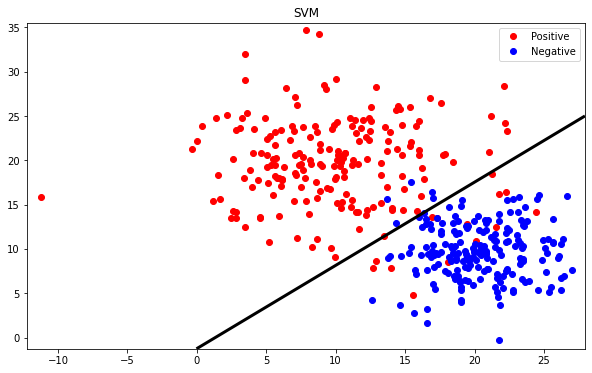

In [18]:
#SVM plot
clf = svm.SVC(kernel="linear")
X = np.array(df1[["x1","x2"]])
y = np.array(df1["y"])
clf = svm.SVC(kernel="linear")
clf.fit(X, y)
xy = np.vstack([xx.ravel(), yy.ravel()]).T
Z = clf.decision_function(xy).reshape(xx.shape)

plt.figure(figsize=(10,6))
ax=plt.gca()

ax.plot(df1_positive["x1"], df1_positive["x2"], 'ro', markersize=6, zorder=1)
ax.plot(df1_negative["x1"], df1_negative["x2"], 'bo', markersize=6, zorder=1)
ax.contour(xx, yy, Z, colors='black', levels=[ 0],linestyles=['-'], linewidths=3 ,zorder=2)
plt.legend(["Positive","Negative","Decision boundary"])
plt.title("SVM")

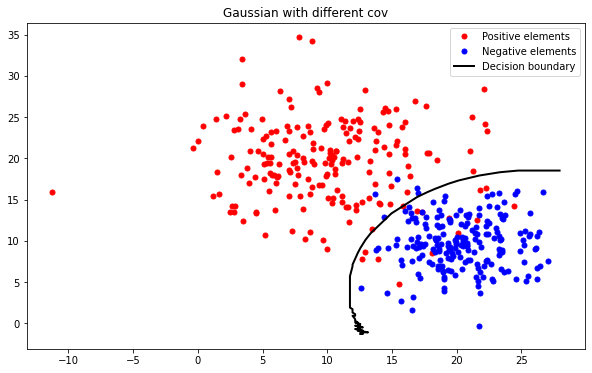

In [13]:
#plotting graph for model with different cov for each class   
plt.figure(figsize=(10,6))
plt.plot(df1_positive["x1"], df1_positive["x2"], 'ro', markersize=5, zorder=1)
plt.plot(df1_negative["x1"], df1_negative["x2"], 'bo', markersize=5, zorder=1)
plt.plot(l_x,l_y, linewidth= 2, c='black')
plt.legend(["Positive elements", "Negative elements","Decision boundary"])
plt.title("Gaussian with different cov")
plt.show()

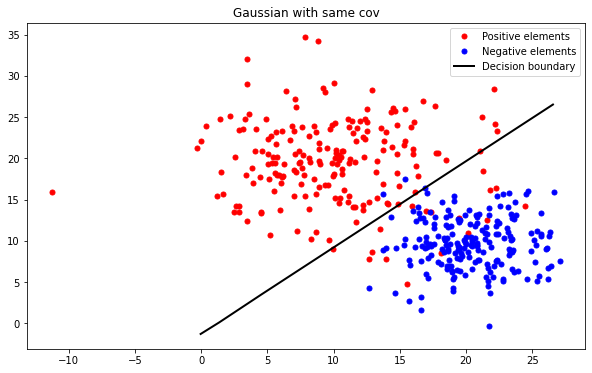

In [14]:
#plotting graph for model with same cov for each class
plt.figure(figsize=(10,6))
plt.plot(df1_positive["x1"], df1_positive["x2"], 'ro', markersize=5, zorder=1)
plt.plot(df1_negative["x1"], df1_negative["x2"], 'bo', markersize=5, zorder=1)
plt.plot(l_x1,l_y1, linewidth=2, c='black')
plt.legend(["Positive elements", "Negative elements","Decision boundary"])
plt.title("Gaussian with same cov")
plt.show()